<a href="https://colab.research.google.com/github/abaskon/Thesis/blob/main/GPR_DBI_VAR_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#####Import Libraries

In [96]:
!pip install arch

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [97]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.express as px
import numpy as np
from statsmodels.tsa.arima_model import ARIMA
import arch
from arch import arch_model

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler



#####Read data and standardise them

In [161]:
dbi1 = pd.read_csv("https://raw.githubusercontent.com/abaskon/Thesis/main/Data/DBI1985-2004.csv")
dbi2 = pd.read_csv("https://raw.githubusercontent.com/abaskon/Thesis/main/Data/DBI2004-today.csv")

dbi1['Price'] = dbi1['Price'].str.replace(',', '').astype(float)
dbi2['Price'] = dbi2['Price'].str.replace(',', '').astype(float)

In [162]:
dbi1['Date'] = pd.to_datetime(dbi1['Date'], format='%m/%d/%Y')
dbi2['Date'] = pd.to_datetime(dbi2['Date'], format='%m/%d/%Y')

In [163]:
dbi1.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,2004-11-22,5442.0,"5,442.00","5,442.00","5,442.00",NaN,0.91%
1,2004-11-19,5393.0,"5,393.00","5,393.00","5,393.00",NaN,1.09%
2,2004-11-18,5335.0,"5,335.00","5,335.00","5,335.00",NaN,1.35%
3,2004-11-17,5264.0,"5,264.00","5,264.00","5,264.00",NaN,1.41%
4,2004-11-16,5191.0,"5,191.00","5,191.00","5,191.00",NaN,0.76%


In [164]:
# concatenate the two tables based on the 'date' column
DBI = pd.concat([dbi1, dbi2]).drop_duplicates(subset='Date')

DBI = DBI.sort_values(by='Date', ascending=True)
DBI = DBI.reset_index(drop=True)

In [165]:
DBI

,Date,Price,Open,High,Low,Vol.,Change %
0,1985-01-07,998.5,998.50,998.50,998.50,NaN,-0.15%
1,1985-01-08,996.5,996.50,996.50,996.50,NaN,-0.20%
2,1985-01-09,994.5,994.50,994.50,994.50,NaN,-0.20%
3,1985-01-10,979.5,979.50,979.50,979.50,NaN,-1.51%
4,1985-01-11,980.5,980.50,980.50,980.50,NaN,0.10%
...,...,...,...,...,...,...,...
9595,2023-04-28,1576.0,"1,576.00","1,576.00","1,576.00",NaN,-0.32%
9596,2023-05-02,1552.0,"1,552.00","1,552.00","1,552.00",NaN,-1.52%
9597,2023-05-03,1558.0,"1,558.00","1,558.00","1,558.00",NaN,0.39%
9598,2023-05-04,1545.0,"1,545.00","1,545.00","1,545.00",NaN,-0.83%


In [166]:
GPR = pd.read_csv("https://raw.githubusercontent.com/abaskon/Thesis/main/Data/data_gpr_daily_recent.csv")
GPRE = pd.read_csv("https://raw.githubusercontent.com/abaskon/Thesis/main/Data/data_gpr_export.csv")
GPR['GPRD'] = GPR['GPRD'].str.replace(',', '').astype(float)


In [167]:
GPR

,DAY,N10D,GPRD,GPRD_ACT,GPRD_THREAT,date,GPRD_MA30,GPRD_MA7,event,var_name,var_label
0,19850101,216,230.04,275.20,153.03,01-01-1985,230.04,230.04,NaN,DAY,DAY
1,19850102,315,115.68,146.77,87.44,02-01-1985,172.86,172.86,NaN,N10D,"Number of articles (10 recent newspapers, 1985-)"
2,19850103,374,97.43,158.94,29.46,03-01-1985,147.71,147.71,NaN,GPRD,Daily GPR (Index: 1985:2019=100)
3,19850104,421,157.37,156.88,157.03,04-01-1985,150.13,150.13,NaN,GPRD_ACT,Daily GPR Acts (Index: 1985:2019=100)
4,19850105,285,81.36,92.70,77.32,05-01-1985,136.37,136.37,NaN,GPRD_THREAT,Daily GPR Threats (Index: 1985:2019=100)
...,...,...,...,...,...,...,...,...,...,...,...
13988,20230420,470,98.67,126.47,70.33,20-04-2023,93.04,98.11,NaN,NaN,NaN
13989,20230421,453,117.00,102.06,121.61,21-04-2023,92.90,98.72,NaN,NaN,NaN
13990,20230422,522,63.46,101.22,31.66,22-04-2023,91.56,95.33,NaN,NaN,NaN
13991,20230423,355,55.99,93.02,31.04,23-04-2023,90.75,97.36,NaN,NaN,NaN


In [168]:
GPR['date'] = pd.to_datetime(GPR['date'], format='%d-%m-%Y')
GPR = GPR.rename(columns={'date': 'Date'})

In [169]:
GPR = GPR[['Date', 'GPRD', 'event']]

In [170]:
GPR.head(4)

,Date,GPRD,event
0,1985-01-01,230.04,NaN
1,1985-01-02,115.68,NaN
2,1985-01-03,97.43,NaN
3,1985-01-04,157.37,NaN


In [171]:
GPRE['month'] = pd.to_datetime(GPRE['month'], format='%d-%m-%Y')
GPRE = GPRE.rename(columns={'month': 'Date'})

In [172]:
GPRE.head(6)

,Date,GPR,GPRT,GPRA,GPRH,GPRHT,GPRHA,SHARE_GPR,N10,SHARE_GPRH,...,GPRHC_THA,GPRHC_TUN,GPRHC_TUR,GPRHC_TWN,GPRHC_UKR,GPRHC_USA,GPRHC_VEN,GPRHC_ZAF,var_name,var_label
0,1900-01-01,NaN,NaN,NaN,87.93,64.72,110.45,NaN,NaN,3.17,...,0.08,0.00,0.04,0.00,0.0,2.72,0.05,1.15,month,Date (year/month)
1,1900-02-01,NaN,NaN,NaN,86.57,71.94,96.25,NaN,NaN,3.12,...,0.08,0.00,0.13,0.00,0.0,2.73,0.03,1.14,GPR,Recent GPR (Index: 1985:2019=100)
2,1900-03-01,NaN,NaN,NaN,72.14,57.48,84.50,NaN,NaN,2.60,...,0.12,0.00,0.18,0.00,0.0,2.15,0.03,0.86,GPRT,Recent GPR Threats (Index: 1985:2019=100)
3,1900-04-01,NaN,NaN,NaN,54.42,37.33,65.86,NaN,NaN,1.96,...,0.04,0.00,0.07,0.00,0.0,1.78,0.00,0.64,GPRA,Recent GPR Acts (Index: 1985:2019=100)
4,1900-05-01,NaN,NaN,NaN,64.41,48.20,74.37,NaN,NaN,2.32,...,0.16,0.00,0.08,0.00,0.0,1.97,0.01,0.79,GPRH,Historical GPR (Index: 1900:2019=100)
5,1900-06-01,NaN,NaN,NaN,83.61,70.01,93.98,NaN,NaN,3.02,...,0.08,0.01,0.11,0.03,0.0,2.73,0.03,0.67,GPRHT,Historical GPR Threats (Index: 1900:2019=100)


In [173]:
GPRE[GPRE["Date"] == "1985-02-01"]

,Date,GPR,GPRT,GPRA,GPRH,GPRHT,GPRHA,SHARE_GPR,N10,SHARE_GPRH,...,GPRHC_THA,GPRHC_TUN,GPRHC_TUR,GPRHC_TWN,GPRHC_UKR,GPRHC_USA,GPRHC_VEN,GPRHC_ZAF,var_name,var_label
1021,1985-02-01,117.1,126.44,96.6,99.55,127.21,75.1,3.51,10819.0,3.59,...,0.2,0.04,0.03,0.0,0.01,3.34,0.07,0.11,NaN,NaN


In [174]:
GPR[GPR["Date"] == "1985-02-01"]

,Date,GPRD,event
31,1985-02-01,106.61,NaN


In [175]:
GPRE = GPRE[['Date', 'GPR','GPRC_ARG', 'GPRC_AUS', 'GPRC_BEL', 'GPRC_BRA', 'GPRC_CAN', 'GPRC_CHE', 'GPRC_CHL', 'GPRC_CHN', 'GPRC_COL', 'GPRC_DEU', 'GPRC_DNK', 'GPRC_EGY', 'GPRC_ESP', 'GPRC_FIN', 'GPRC_FRA', 'GPRC_GBR', 'GPRC_HKG', 'GPRC_HUN', 'GPRC_IDN', 'GPRC_IND', 'GPRC_ISR', 'GPRC_ITA', 'GPRC_JPN', 'GPRC_KOR', 'GPRC_MEX', 'GPRC_MYS', 'GPRC_NLD', 'GPRC_NOR', 'GPRC_PER', 'GPRC_PHL', 'GPRC_POL', 'GPRC_PRT', 'GPRC_RUS', 'GPRC_SAU', 'GPRC_SWE', 'GPRC_THA', 'GPRC_TUN', 'GPRC_TUR', 'GPRC_TWN', 'GPRC_UKR', 'GPRC_USA', 'GPRC_VEN', 'GPRC_ZAF']]

In [176]:
GPRE = GPRE[GPRE['Date'] >= '1985-02-01']

In [177]:
GPRE

,Date,GPR,GPRC_ARG,GPRC_AUS,GPRC_BEL,GPRC_BRA,GPRC_CAN,GPRC_CHE,GPRC_CHL,GPRC_CHN,...,GPRC_SAU,GPRC_SWE,GPRC_THA,GPRC_TUN,GPRC_TUR,GPRC_TWN,GPRC_UKR,GPRC_USA,GPRC_VEN,GPRC_ZAF
1021,1985-02-01,117.10,0.03,0.35,0.18,0.02,0.45,0.06,0.06,0.18,...,0.12,0.10,0.16,0.03,0.02,0.01,0.01,2.86,0.05,0.08
1022,1985-03-01,124.78,0.08,0.12,0.17,0.02,0.59,0.20,0.09,0.11,...,0.06,0.02,0.15,0.04,0.24,0.00,0.03,2.95,0.04,0.15
1023,1985-04-01,87.93,0.03,0.07,0.08,0.03,0.34,0.02,0.05,0.20,...,0.10,0.03,0.05,0.00,0.12,0.02,0.03,2.00,0.12,0.14
1024,1985-05-01,103.26,0.07,0.04,0.10,0.07,0.43,0.06,0.05,0.13,...,0.09,0.08,0.06,0.02,0.02,0.01,0.01,2.39,0.11,0.16
1025,1985-06-01,148.78,0.02,0.03,0.09,0.04,0.50,0.23,0.04,0.12,...,0.09,0.07,0.02,0.05,0.07,0.02,0.01,3.81,0.05,0.26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1474,2022-11-01,118.74,0.03,0.12,0.28,0.13,0.28,0.05,0.01,1.15,...,0.17,0.14,0.04,0.03,0.49,0.40,2.48,2.75,0.03,0.08
1475,2022-12-01,113.86,0.03,0.20,0.19,0.06,0.22,0.06,0.01,0.89,...,0.17,0.11,0.03,0.01,0.26,0.30,2.26,2.60,0.06,0.04
1476,2023-01-01,105.63,0.03,0.13,0.21,0.12,0.29,0.17,0.02,0.70,...,0.05,0.17,0.03,0.01,0.22,0.17,1.99,2.42,0.03,0.04
1477,2023-02-01,127.34,0.01,0.16,0.34,0.06,0.42,0.05,0.04,1.58,...,0.15,0.15,0.02,0.01,0.51,0.37,2.12,3.15,0.02,0.10


#####Visualisations

In [155]:
def plotgraph(df, x, y):
    df[y] = pd.to_numeric(df[y])
    df.plot(x=x, y=y, figsize=(20, 4))
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title('USD per Metric Tonne')
    plt.show()


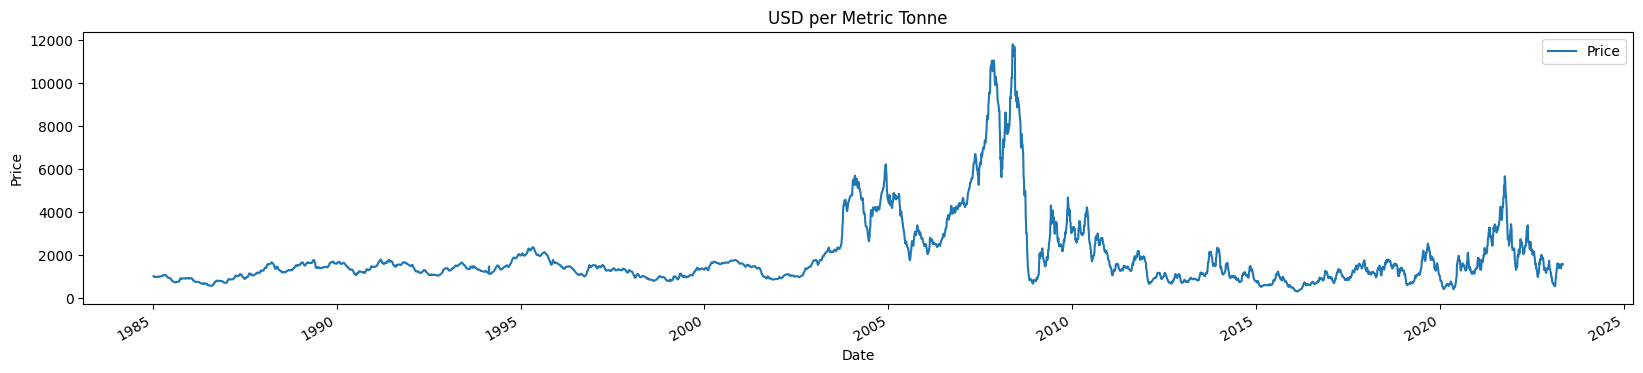

In [156]:
plotgraph(DBI,'Date','Price')

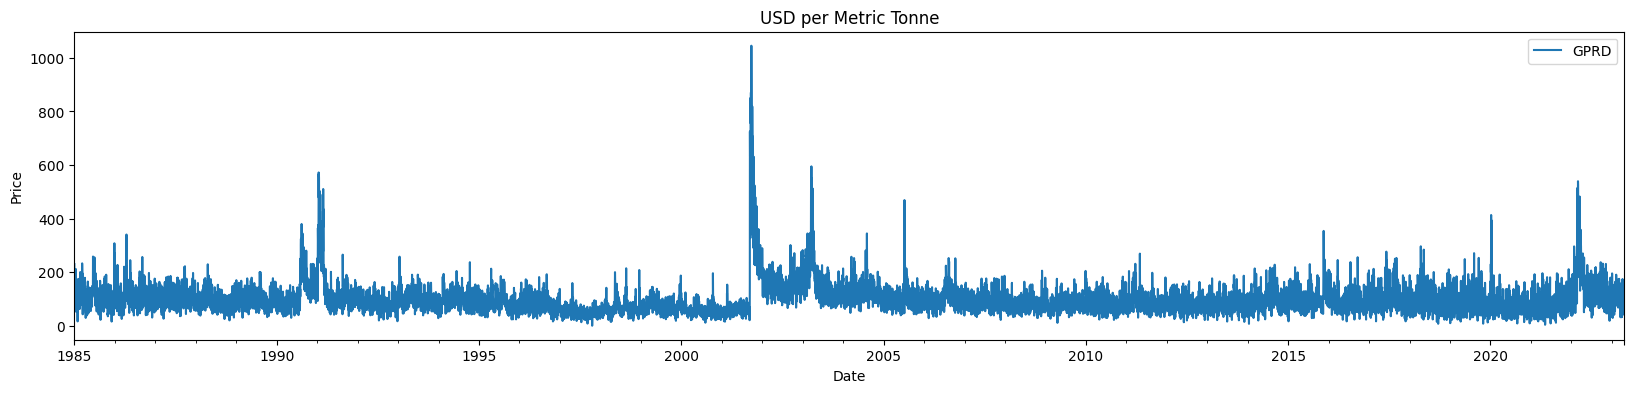

In [178]:
plotgraph(GPR,'Date','GPRD')

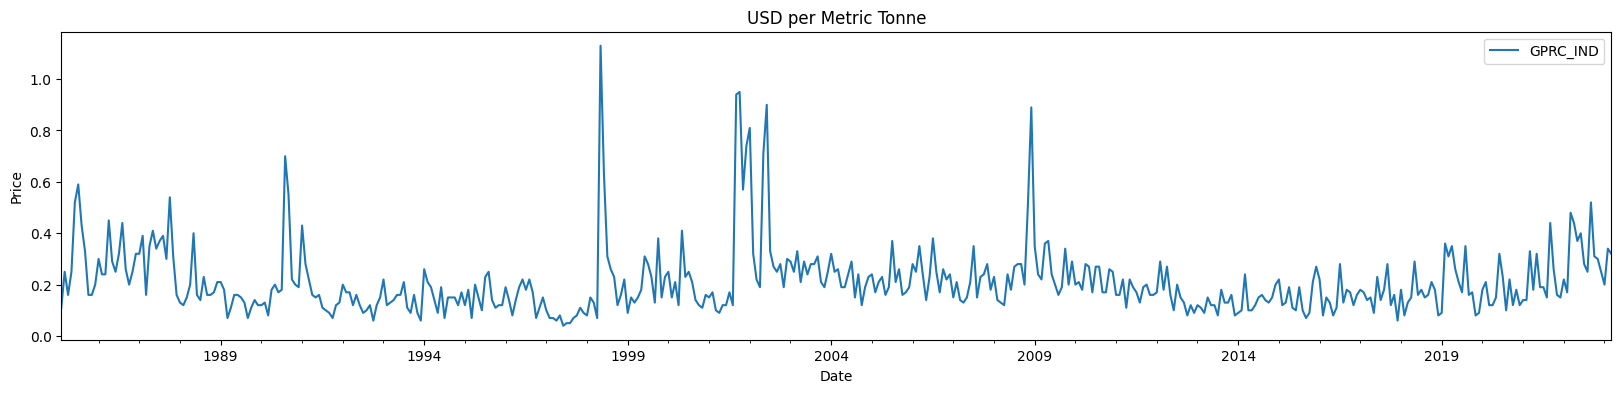

In [180]:
plotgraph(GPRE,'Date','GPRC_IND')

In [ ]:
# Plotly line plot
fig = go.Figure(data=[go.Scatter(x=DBI['Date'], y=DBI['Price'])])
fig.show()


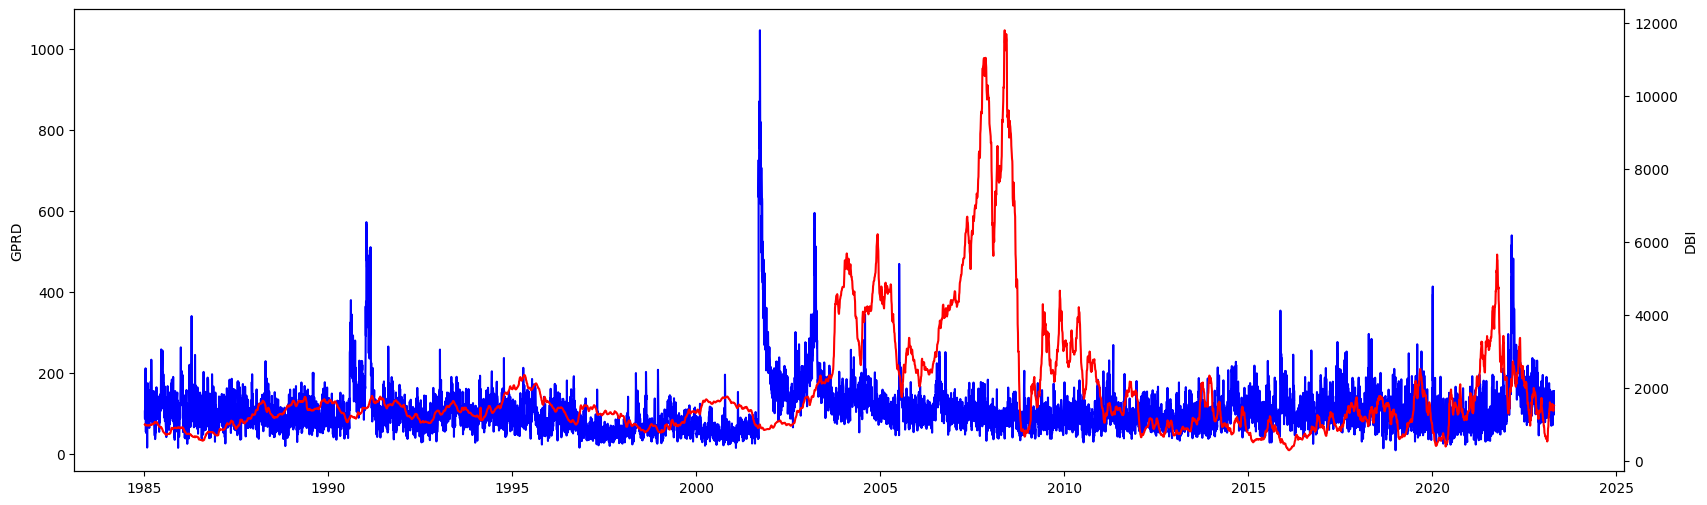

In [ ]:

# Merge the two DataFrames based on the common x value
merged_df = pd.merge(DBI, GPR, on='Date')

# select every third row
#merged_df = merged_df.iloc[::10, :]

import pandas as pd
import matplotlib.pyplot as plt


# create a figure and axis objects
fig, ax1 = plt.subplots(figsize=(20, 6))

# plot the 'A' column on the first y-axis
ax1.plot(merged_df.Date, merged_df['GPRD'], color='blue')
ax1.set_ylabel('GPRD')

# create a second y-axis object
ax2 = ax1.twinx()

# plot the 'B' column on the second y-axis
ax2.plot(merged_df.Date, merged_df['Price'], color='red')
ax2.set_ylabel('DBI')

# normalize the two y-axis scales


# display the plot
plt.show()

<ipython-input-32-ff7a147d4bfd>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



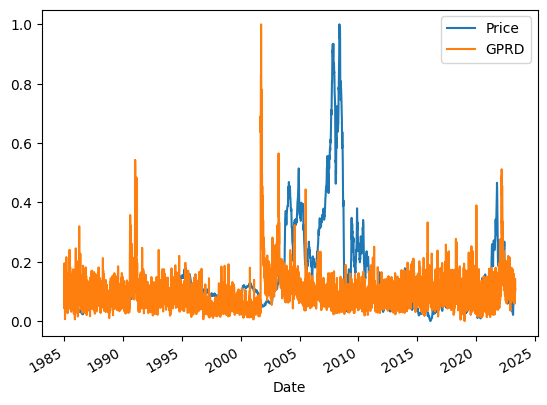

In [ ]:

df = merged_df[['Date','Price','GPRD']]
# Normalize col1 and col2 columns using MinMaxScaler
scaler = MinMaxScaler()
df[['Price', 'GPRD']] = scaler.fit_transform(df[['Price', 'GPRD']])

# Plot col1 and col2 columns
df.plot(x='Date', y=['Price', 'GPRD'])
plt.show()

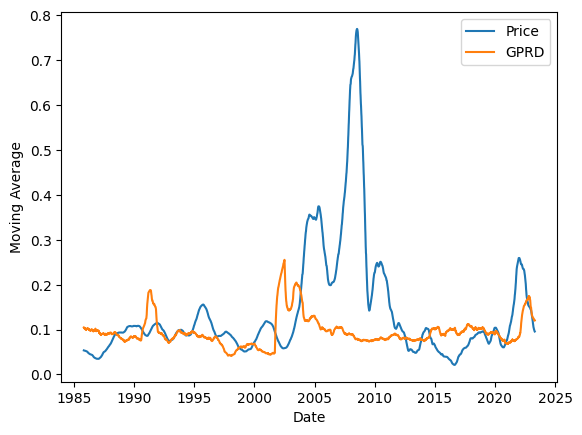

In [ ]:
df.set_index('Date', inplace=True)

# calculate the rolling mean of Price and GPRD with a window of 30 days
rolling_mean = df.rolling(window=200).mean()

# plot the rolling mean of Price and GPRD with Date as x-axis
plt.plot(rolling_mean['Price'], label='Price')
plt.plot(rolling_mean['GPRD'], label='GPRD')
plt.xlabel('Date')
plt.ylabel('Moving Average')
plt.legend()
plt.show()

Correlation coefficient: -0.00780488422627485


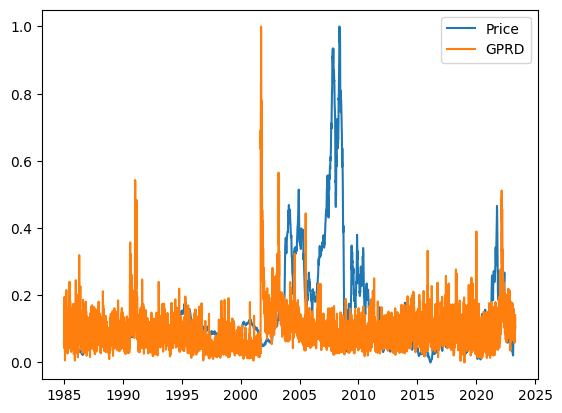

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr


# Calculate the correlation coefficient
corr, _ = pearsonr(df['Price'], df['GPRD'])
print('Correlation coefficient:', corr)

# Plot the graph
plt.plot(df.index, df['Price'], label='Price')
plt.plot(df.index, df['GPRD'], label='GPRD')
plt.legend()
plt.show()

In [ ]:
rolling_mean = rolling_mean.fillna(0)

Correlation coefficient: 0.07126486753808574


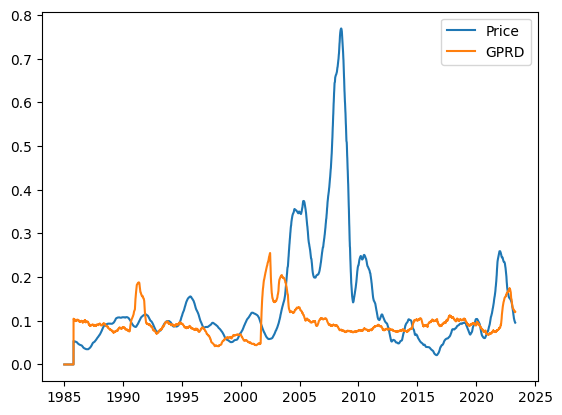

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

rolling_mean.fillna(0)
# Calculate the correlation coefficient
corr, _ = pearsonr(rolling_mean['Price'], rolling_mean['GPRD'])
print('Correlation coefficient:', corr)

# Plot the graph
plt.plot(rolling_mean.index, rolling_mean['Price'], label='Price')
plt.plot(rolling_mean.index, rolling_mean['GPRD'], label='GPRD')
plt.legend()
plt.show()

In [ ]:
df

,Price,GPRD
Date,,
1985-01-07,0.061593,0.092481
1985-01-08,0.061419,0.075195
1985-01-09,0.061245,0.108010
1985-01-10,0.059941,0.126570
1985-01-11,0.060028,0.082385
...,...,...
2023-04-18,0.093715,0.083292
2023-04-19,0.094062,0.133567
2023-04-20,0.099278,0.086072


In [ ]:
corr_p = df.corr(method='pearson')
corr_p

,Price,GPRD
Price,1.000000,-0.007805
GPRD,-0.007805,1.000000


In [ ]:
corr_s = df.corr(method='spearman')
corr_s

,Price,GPRD
Price,1.000000,0.047779
GPRD,0.047779,1.000000


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
print(df.describe())

             Price         GPRD
count  9592.000000  9592.000000
mean      0.138185     0.095237
std       0.139957     0.060652
min       0.000000     0.000000
25%       0.063288     0.061678
50%       0.095888     0.083785
75%       0.145180     0.113547
max       1.000000     1.000000


In [ ]:
print(df.isnull().sum())

Price    0
GPRD     0
dtype: int64


In [ ]:
df.dropna(inplace=True)
print(df.isnull().sum())

Price    0
GPRD     0
dtype: int64


<ipython-input-43-c3ca3ed608b0>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9592 entries, 1985-01-07 to 2023-04-24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Price   9592 non-null   float64
 1   GPRD    9592 non-null   float64
dtypes: float64(2)
memory usage: 224.8 KB


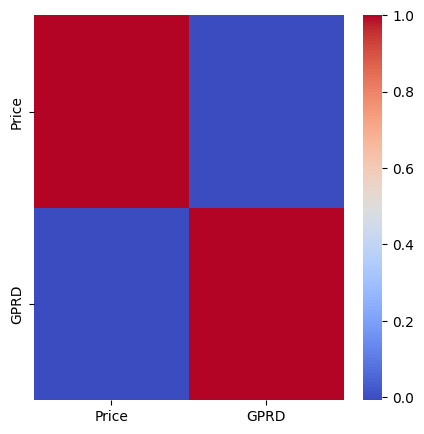

In [ ]:
import seaborn as sns
plt.figure(figsize=(5,5))
sns.heatmap(df.corr(),cmap='coolwarm');

<ipython-input-46-75a93b2fa51d>:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='Price', ylabel='Density'>

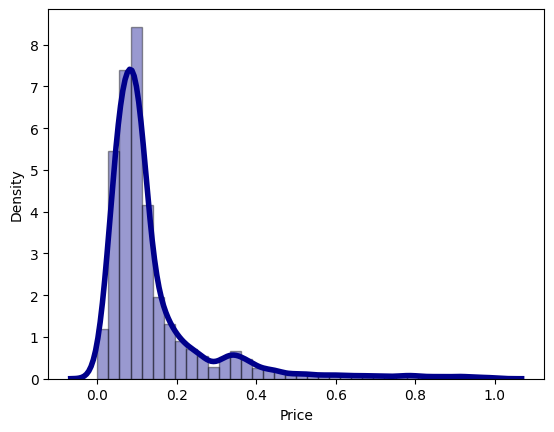

In [ ]:
sns.distplot(df['Price'], hist=True, kde=True,
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

<ipython-input-47-a6246333e5f0>:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='GPRD', ylabel='Density'>

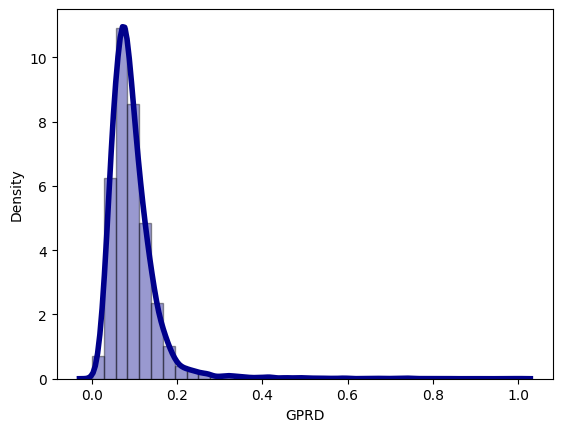

In [ ]:
sns.distplot(df['GPRD'], hist=True, kde=True,
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9592 entries, 1985-01-07 to 2023-04-24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Price   9592 non-null   float64
 1   GPRD    9592 non-null   float64
dtypes: float64(2)
memory usage: 224.8 KB


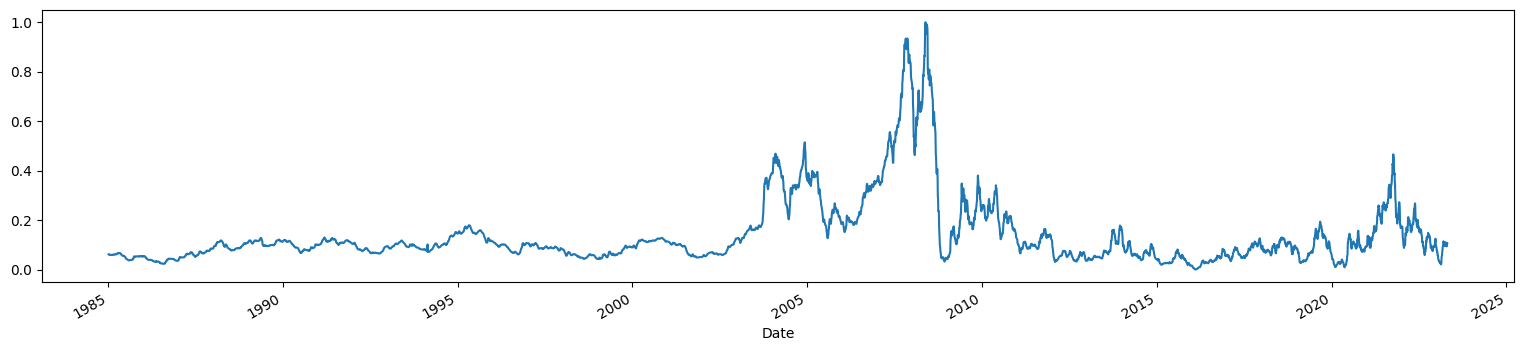

In [ ]:
df['Price'].plot(figsize=(19, 4))
plt.show()

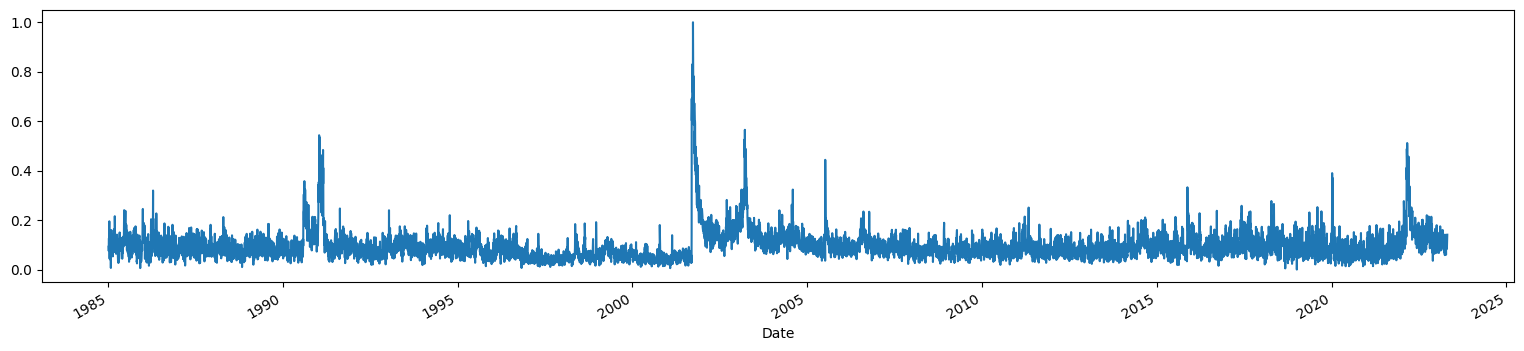

In [ ]:
df['GPRD'].plot(figsize=(19, 4))
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Import Statsmodels
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse, aic

from statsmodels.tsa.stattools import grangercausalitytests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
gc_res = grangercausalitytests(df, 3)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.8935  , p=0.0890  , df_denom=9588, df_num=1
ssr based chi2 test:   chi2=2.8944  , p=0.0889  , df=1
likelihood ratio test: chi2=2.8939  , p=0.0889  , df=1
parameter F test:         F=2.8935  , p=0.0890  , df_denom=9588, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.4756  , p=0.6215  , df_denom=9585, df_num=2
ssr based chi2 test:   chi2=0.9517  , p=0.6214  , df=2
likelihood ratio test: chi2=0.9516  , p=0.6214  , df=2
parameter F test:         F=0.4756  , p=0.6215  , df_denom=9585, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.6220  , p=0.6007  , df_denom=9582, df_num=3
ssr based chi2 test:   chi2=1.8675  , p=0.6004  , df=3
likelihood ratio test: chi2=1.8673  , p=0.6004  , df=3
parameter F test:         F=0.6220  , p=0.6007  , df_denom=9582, df_num=3


In [ ]:
# Testing for causality with Granger's causality test
from statsmodels.tsa.stattools import grangercausalitytests
maxlag = 12
test = 'ssr_chi2test'

def grangers_causation_matrix(df, variables, test='ssr_chi2test', verbose=False):    
    """Check Granger Causality of all possible combinations of the Time series.
    The rows are the response variable, columns are predictors. The values in the table 
    are the P-Values. P-Values lesser than the significance level (0.05), implies 
    the Null Hypothesis that the coefficients of the corresponding past values is 
    zero, that is, the X does not cause Y can be rejected.

    EconomyData: pandas dataframe containing the time series variables
    variables: list containing names of the time series variables.
    """
    df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df.columns:
        for r in df.index:
            test_result = grangercausalitytests(df[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1], 4) for i in range(maxlag)]
            if verbose:
                print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df.loc[r, c] = min_p_value
    df.columns = [var + '_x' for var in variables]
    df.index = [var + '_y' for var in variables]
    return df

grangers_causation_matrix(df, variables=df.columns)


ValueError: ignored

In [ ]:
df.columns


USDINRCLOSE and CrudeOil show the causation factor but not gold. still being considered.

In [ ]:
#cointegration test to find statistical relation amongst variables.
from statsmodels.tsa.vector_ar.vecm import coint_johansen

def cointegration_test(EconomyData, alpha=0.05): 
    """Perform Johanson's Cointegration Test and Report Summary"""
    out = coint_johansen(EconomyData,-1,5)
    d = {'0.90':0, '0.95':1, '0.99':2}
    traces = out.lr1
    cvts = out.cvt[:, d[str(1-alpha)]]
    def adjust(val, length= 6): return str(val).ljust(length)

    # Summary
    print('Name   ::  Test Stat > C(95%)    =>   Signif  \n', '--'*20)
    for col, trace, cvt in zip(EconomyData.columns, traces, cvts):
        print(adjust(col), ':: ', adjust(round(trace,2), 9), ">", adjust(cvt, 8), ' =>  ' , trace > cvt)

cointegration_test(EconomyData)

If there is cointegration:
1.    Implies that the series in question are related and therefore can be combined in a linear fashion.
2.  That is, even if there are shocks in the short run, which may affect movement in the individual series, they would converge with time (in the long run).
3.    Estimate both long-run and short-run models.
4. The estimation will require the use of vector autoregressive (VAR) model and vector error correction model (VECM) analysis.

If there is no cointegration:
1.    Estimate only the short-run model, which is VAR and not VECM.
source : http://cruncheconometrix.blogspot.com/2018/03/time-series-analysis-lecture-4-part-1.html

In [ ]:
nobs = 4
EconomyData_train, EconomyData_test = EconomyData[0:-nobs], EconomyData[-nobs:]

# Check size
print(EconomyData_train.shape)  # (154, 3)
print(EconomyData_test.shape)  # (4, 3)

In [ ]:
def adfuller_test(series, signif=0.05, name='', verbose=False):
    """Perform ADFuller to test for Stationarity of given series and print report"""
    r = adfuller(series, autolag='AIC')
    output = {'test_statistic':round(r[0], 4), 'pvalue':round(r[1], 4), 'n_lags':round(r[2], 4), 'n_obs':r[3]}
    p_value = output['pvalue'] 
    def adjust(val, length= 6): return str(val).ljust(length)

    # Print Summary
    print(f'    Augmented Dickey-Fuller Test on "{name}"', "\n   ", '-'*47)
    print(f' Null Hypothesis: Data has unit root. Non-Stationary.')
    print(f' Significance Level    = {signif}')
    print(f' Test Statistic        = {output["test_statistic"]}')
    print(f' No. Lags Chosen       = {output["n_lags"]}')

    for key,val in r[4].items():
        print(f' Critical value {adjust(key)} = {round(val, 3)}')

    if p_value <= signif:
        print(f" => P-Value = {p_value}. Rejecting Null Hypothesis.")
        print(f" => Series is Stationary.")
    else:
        print(f" => P-Value = {p_value}. Weak evidence to reject the Null Hypothesis.")
        print(f" => Series is Non-Stationary.")

In [ ]:
# ADF Test on each column
for name, column in EconomyData_train.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

In [ ]:
#series needs to be stationary hence differencing it.
#1st difference
EconomyData_train = EconomyData_train.diff().dropna()


In [ ]:
# ADF Test on each column
for name, column in EconomyData_train.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

Now after 1st order of differencing as per the ADF test where p value < 0.05 it can be said the series is stationary

In [ ]:
model = VAR(EconomyData_train)
for i in [1,2,3,4,5,6,7,8,9]:
    result = model.fit(i)
    print('Lag Order =', i)
    print('AIC : ', result.aic)
    print('BIC : ', result.bic)
    print('FPE : ', result.fpe)
    print('HQIC: ', result.hqic, '\n')

In [ ]:
x = model.select_order(maxlags=12)
x.summary()


In [ ]:
model_fitted = model.fit(2)
model_fitted.summary()

In [ ]:
#to check if any serial pattern is still left in the residuals durbin watson statistical test can be performed.
#The value of this statistic can vary between 0 and 4. The closer it is to the value 2, 
#then there is no significant serial correlation.
#The closer to 0, there is a positive serial correlation, and the closer it is to 4 implies negative serial correlation.
from statsmodels.stats.stattools import durbin_watson
out = durbin_watson(model_fitted.resid)

for col, val in zip(EconomyData_train.columns, out):
    print(col, ':', round(val, 2))

As the values are closer to 2 no significant correlation.

In [ ]:
#forecasting
# Get the lag order
lag_order = model_fitted.k_ar
print(lag_order)  #> 4

# Input data for forecasting
forecast_input = EconomyData_train.values[-lag_order:]
forecast_input

In [ ]:
# Forecast
fc = model_fitted.forecast(y=forecast_input, steps=nobs)
df_forecast = pd.DataFrame(fc, index=EconomyData.index[-nobs:], columns=EconomyData.columns + '_2d')
df_forecast

In [ ]:
#inverting the values from differencing
def invert_transformation(EconomyData_train, df_forecast, second_diff=False):
    """Revert back the differencing to get the forecast to original scale."""
    df_fc = df_forecast.copy()
    columns = EconomyData_train.columns
    for col in columns:        
        # Roll back 2nd Diff
        if second_diff:
            df_fc[str(col)+'_2d'] = (EconomyData_train[col].iloc[-1]-EconomyData_train[col].iloc[-2]) + EconomyData_train[str(col)+'_2d'].cumsum()
        # Roll back 1st Diff
        df_fc[str(col)+'_forecast'] = EconomyData_train[col].iloc[-1] + df_fc[str(col)+'_2d'].cumsum()
    return df_fc

In [ ]:
df_results = invert_transformation(EconomyData_train, df_forecast)        
df_results.loc[:, ['USDINRClose_forecast', 'CrudeOil_forecast', 'Gold_forecast']]

In [ ]:
fig, axes = plt.subplots(nrows=int(len(EconomyData.columns)/2), ncols=2, dpi=150, figsize=(7,7))
for i, (col,ax) in enumerate(zip(EconomyData.columns, axes.flatten())):
    df_results[col+'_forecast'].plot(legend=True, ax=ax).autoscale(axis='x',tight=True)
    EconomyData_test[col][-nobs:].plot(legend=True, ax=ax);
    ax.set_title(col + ": Forecast vs Actuals")
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();

In [ ]:
from statsmodels.tsa.stattools import acf
def forecast_accuracy(forecast, actual):
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    return({'rmse':rmse})

print('Forecast Accuracy of: USDINRClose')
accuracy_prod = forecast_accuracy(df_results['USDINRClose_forecast'].values, EconomyData_test['USDINRClose'])
for k, v in accuracy_prod.items():
    print((k), ': ', round(v,4))

print('\nForecast Accuracy of: CrudeOil')
accuracy_prod = forecast_accuracy(df_results['CrudeOil_forecast'].values, EconomyData_test['CrudeOil'])
for k, v in accuracy_prod.items():
    print((k), ': ', round(v,4))

print('\nForecast Accuracy of: Gold')
accuracy_prod = forecast_accuracy(df_results['Gold_forecast'].values, EconomyData_test['Gold'])
for k, v in accuracy_prod.items():
    print((k), ': ', round(v,4))


In [ ]:
ax = plt.gca()

EconomyData1.plot(kind='line',x='Date',y='USDINRClose',ax=ax)
EconomyData1.plot(kind='line',x='Date',y='CrudeOil', color='red', ax=ax)
#EconomyData1.plot(kind='line',x='Date',y='Gold', color='yellow', ax=ax)

plt.show()

In [ ]:
ax = plt.gca()

EconomyData1.plot(kind='line',x='Date',y='Gold',ax=ax,color="yellow")
plt.show()

In [ ]:
dbi1 = pd.read_csv("https://raw.githubusercontent.com/abaskon/Thesis/main/Data/DBI1985-2004.csv")
dbi2 = pd.read_csv("https://raw.githubusercontent.com/abaskon/Thesis/main/Data/DBI2004-today.csv")

dbi1['Price'] = dbi1['Price'].str.replace(',', '').astype(float)
dbi2['Price'] = dbi2['Price'].str.replace(',', '').astype(float)

GPR = pd.read_csv("https://raw.githubusercontent.com/abaskon/Thesis/main/Data/data_gpr_daily_recent.csv")
GPRE = pd.read_csv("https://raw.githubusercontent.com/abaskon/Thesis/main/Data/data_gpr_export.csv")

GPR['GPRD'] = GPR['GPRD'].str.replace(',', '').astype(float)